## Data Analysis 순서

1. 주제 선정<br>
2. 데이터 구조 파악<br>
3. 데이터 전처리<br>
4. 데이터 분석 : 주어진 자료를 가공하여 원하는 정보와 결론을 얻어내는 처리 과정<br>

## kaggle FLFA World Cup : https://www.kaggle.com/abecklas/fifa-world-cup

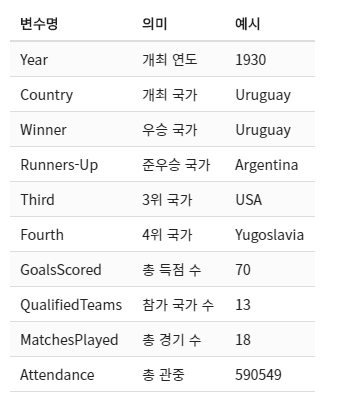

### Q1. csv파일을 읽어와서 Year와 Attendance 칼럼 추출해보기

In [41]:
fifa = pd.read_csv("WorldCups.csv",encoding='cp949')
fifa = fifa[['Year', 'Attendance']][:500][:500]
fifa

,Year,Attendance
0,1930,590.549
1,1934,363.000
2,1938,375.700
3,1950,1.045.246
4,1954,768.607
5,1958,819.810
6,1962,893.172
7,1966,1.563.135
8,1970,1.603.975
9,1974,1.865.753


### Q2. 역대 월드컵의 평균 관중 수를 그래프로 출력해보기

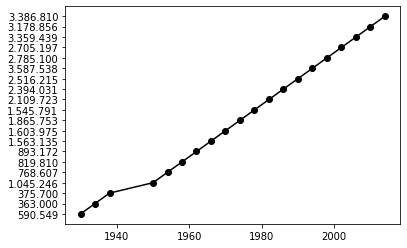

In [44]:
plt.plot(fifa['Year'], fifa['Attendance'],marker = 'o',color='black')

In [49]:
fifa.columns

Index(['Year', 'Attendance'], dtype='object')

### Q3. 역대 월드컵의 경기당 득점 수

In [52]:
fifa2 = pd.read_csv("WorldCups.csv",encoding='cp949')
world_cups = pd.DataFrame(fifa2[['Year','GoalsScored','MatchesPlayed']],
                          columns=['Year','GoalsScored','MatchesPlayed'])
world_cups['GoalsPerMatch'] = world_cups['GoalsScored']/world_cups['MatchesPlayed']

print(world_cups)

    Year  GoalsScored  MatchesPlayed  GoalsPerMatch
0   1930           70             18       3.888889
1   1934           70             17       4.117647
2   1938           84             18       4.666667
3   1950           88             22       4.000000
4   1954          140             26       5.384615
5   1958          126             35       3.600000
6   1962           89             32       2.781250
7   1966           89             32       2.781250
8   1970           95             32       2.968750
9   1974           97             38       2.552632
10  1978          102             38       2.684211
11  1982          146             52       2.807692
12  1986          132             52       2.538462
13  1990          115             52       2.211538
14  1994          141             52       2.711538
15  1998          171             64       2.671875
16  2002          161             64       2.515625
17  2006          147             64       2.296875
18  2010    

### Q3. 역대 월드컵의 경기수와 득점 수 그래프

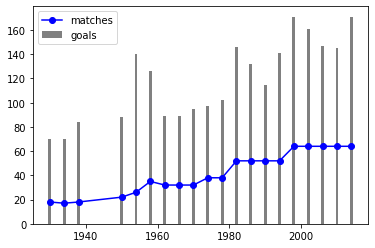

In [60]:
fig, ax = plt.subplots()

ax.bar(world_cups['Year'],world_cups['GoalsScored'],color='gray',label='goals')
ax.plot(world_cups['Year'],world_cups['MatchesPlayed'],'b',marker='o',label='matches')
ax.legend()

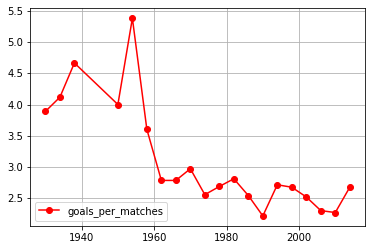

In [68]:
fig, ax = plt.subplots()

ax.plot(world_cups['Year'],world_cups['GoalsPerMatch'],'r',
        marker='o',label='goals_per_matches')
ax.grid(True)
ax.legend(loc='lower left')

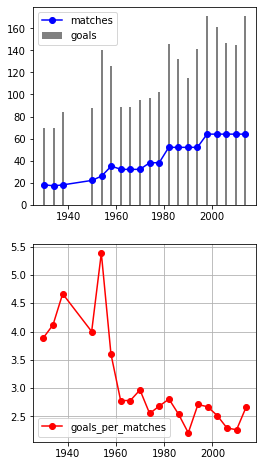

In [69]:
fig, ax = plt.subplots(2,1,figsize=(4,8))

ax[0].bar(world_cups['Year'],world_cups['GoalsScored'],color='gray',label='goals')
ax[0].plot(world_cups['Year'],world_cups['MatchesPlayed'],'b',marker='o',label='matches')
ax[0].legend()

ax[1].plot(world_cups['Year'],world_cups['GoalsPerMatch'],'r',
        marker='o',label='goals_per_matches')
ax[1].grid(True)
ax[1].legend(loc='lower left')

### Q4. 월드컵 매치 데이터 전처리

In [80]:
world_cups_matches = pd.read_csv("WorldCupMatches (1).csv", encoding='utf-8')

world_cups_matches.columns

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name', 'Home Team Goals', 'Away Team Goals', 'Away Team Name', 'Win conditions', 'Attendance', 'Half-time Home Goals', 'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2', 'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'], dtype='object')

In [100]:
# 글자 이상한거 replace 하기
world_cups_matches=world_cups_matches.replace('Germary FR','Germary')
world_cups_matches=world_cups_matches.replace(" C�te d'Ivoire "," Côte d'Ivoire ")
world_cups_matches=world_cups_matches.replace("rn”>Bosnia and Herzegovina","Bosnia and Herzegovina")
world_cups_matches=world_cups_matches.replace("rn”>Serbia and Montenegro","Serbia and Montenegro")
world_cups_matches=world_cups_matches.replace("rn”>Republic of Ireland","Republic of Ireland")
world_cups_matches=world_cups_matches.replace("rn”>Trinidad and Tobago","Trinidad and Tobago")
world_cups_matches=world_cups_matches.replace("rn”>United Arab Emirates","United Arab Emirates")
world_cups_matches=world_cups_matches.replace("Soviet Union","Russia")

In [104]:
dupli = world_cups_matches.duplicated()
print(dupli)

0      False
1      False
2      False
3      False
4      False
       ...  
832    False
833    False
834    False
835    False
852    False
Length: 837, dtype: bool


In [102]:
# 중복된 데이터 다 제거
world_cups_matches = world_cups_matches.drop_duplicates()

In [103]:
world_cups_matches

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,2014.0,29 Jun 2014 - 13:00,Round of 16,Estadio Castelao,Fortaleza,Netherlands,2.0,1.0,Mexico,,58817.0,0.0,0.0,PROENCA Pedro (POR),MIRANDA Bertino (POR),TRIGO Jose (POR),255951.0,300186508.0,NED,MEX
833,2014.0,29 Jun 2014 - 17:00,Round of 16,Arena Pernambuco,Recife,Costa Rica,1.0,1.0,Greece,Costa Rica win on penalties (5 - 3),41242.0,0.0,0.0,Ben WILLIAMS (AUS),CREAM Matthew (AUS),ANAZ Hakan (AUS),255951.0,300186459.0,CRC,GRE
834,2014.0,01 Jul 2014 - 13:00,Round of 16,Arena de Sao Paulo,Sao Paulo,Argentina,1.0,0.0,Switzerland,Argentina win after extra time,63255.0,0.0,0.0,ERIKSSON Jonas (SWE),KLASENIUS Mathias (SWE),WARNMARK Daniel (SWE),255951.0,300186503.0,ARG,SUI
835,2014.0,01 Jul 2014 - 17:00,Round of 16,Arena Fonte Nova,Salvador,Belgium,2.0,1.0,USA,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255951.0,300186497.0,BEL,USA


### Q5. 국가별 득점 수 구하기

In [144]:
home = world_cups_matches.groupby(['Home Team Name'])['Home Team Goals'].sum()

In [145]:
home

Home Team Name
Algeria                         5.0
Angola                          0.0
Argentina                     109.0
Australia                       7.0
Austria                        31.0
Belgium                        25.0
Bolivia                         1.0
Brazil                        176.0
Bulgaria                       11.0
Cameroon                       11.0
Canada                          0.0
Chile                          25.0
China PR                        0.0
Colombia                        9.0
Costa Rica                      6.0
Croatia                         3.0
Cuba                            5.0
Czech Republic                  0.0
Czechoslovakia                 27.0
C�te d'Ivoire                   5.0
Denmark                        13.0
Ecuador                         4.0
England                        54.0
France                         66.0
German DR                       3.0
Germany                        66.0
Germany FR                     99.0
Ghana        

In [146]:
away = world_cups_matches.groupby(['Away Team Name'])['Away Team Goals'].sum()
away

Away Team Name
Algeria                        8.0
Angola                         1.0
Argentina                     22.0
Australia                      4.0
Austria                       12.0
Belgium                       27.0
Bolivia                        0.0
Brazil                        45.0
Bulgaria                      11.0
Cameroon                       7.0
Canada                         0.0
Chile                         15.0
China PR                       0.0
Colombia                      17.0
Costa Rica                    11.0
Croatia                       18.0
Cuba                           0.0
Czech Republic                 3.0
Czechoslovakia                17.0
C�te d'Ivoire                  8.0
Denmark                       14.0
Dutch East Indies              0.0
Ecuador                        6.0
Egypt                          3.0
El Salvador                    1.0
England                       25.0
France                        40.0
German DR                      2.0
Germa

In [147]:
goal_per_country = pd.concat([home,away], axis=1,sort=True).fillna(0)

In [148]:
goal_per_country

,Home Team Goals,Away Team Goals
Algeria,5.0,8.0
Angola,0.0,1.0
Argentina,109.0,22.0
Australia,7.0,4.0
Austria,31.0,12.0
Belgium,25.0,27.0
Bolivia,1.0,0.0
Brazil,176.0,45.0
Bulgaria,11.0,11.0
Cameroon,11.0,7.0


In [149]:
goal_per_country['Goals'] = goal_per_country['Home Team Goals'] + goal_per_country['Away Team Goals']

In [150]:
goal_per_country = goal_per_country['Goals'].sort_values(ascending=False)

In [151]:
goal_per_country = goal_per_country.astype(int)

In [152]:
goal_per_country

Brazil                        221
Argentina                     131
Germany FR                    131
Italy                         128
France                        106
Germany                        93
Spain                          92
Hungary                        87
Netherlands                    86
Uruguay                        80
England                        79
Sweden                         74
Russia                         66
Yugoslavia                     60
Mexico                         57
Belgium                        52
Switzerland                    45
Czechoslovakia                 44
Poland                         44
Austria                        43
Portugal                       43
Chile                          40
USA                            37
Korea Republic                 31
Romania                        30
Paraguay                       30
Denmark                        27
Colombia                       26
Scotland                       25
Bulgaria      

### Q6. 역대 월드컵의 국가별 득점 수

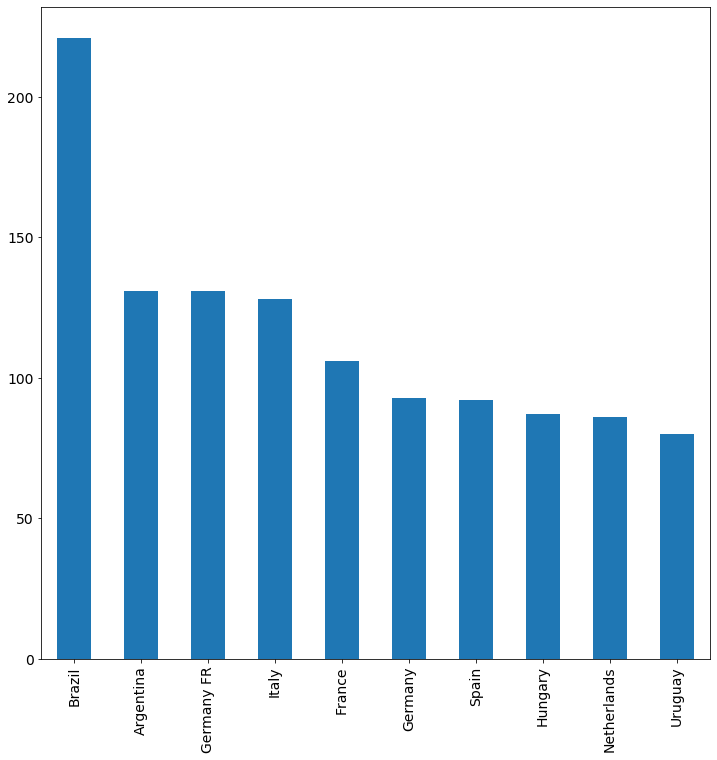

In [158]:
goal_per_country[:10].plot(x=goal_per_country.index, y=goal_per_country.values, kind="bar", figsize=(12, 12), fontsize=14)

## Q7. 2014 월드컵 다득점 국가 순위

In [165]:
world_cups_matches = pd.read_csv("WorldCupMatches (1).csv", encoding='utf-8')

world_cups_matches = world_cups_matches[world_cups_matches['Year']==2014]
world_cups_matches

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
772,2014.0,12 Jun 2014 - 17:00,Group A,Arena de Sao Paulo,Sao Paulo,Brazil,3.0,1.0,Croatia,,62103.0,1.0,1.0,NISHIMURA Yuichi (JPN),SAGARA Toru (JPN),NAGI Toshiyuki (JPN),255931.0,300186456.0,BRA,CRO
773,2014.0,13 Jun 2014 - 13:00,Group A,Estadio das Dunas,Natal,Mexico,1.0,0.0,Cameroon,,39216.0,0.0,0.0,ROLDAN Wilmar (COL),CLAVIJO Humberto (COL),DIAZ Eduardo (COL),255931.0,300186492.0,MEX,CMR
774,2014.0,13 Jun 2014 - 16:00,Group B,Arena Fonte Nova,Salvador,Spain,1.0,5.0,Netherlands,,48173.0,1.0,1.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255931.0,300186510.0,ESP,NED
775,2014.0,13 Jun 2014 - 18:00,Group B,Arena Pantanal,Cuiaba,Chile,3.0,1.0,Australia,,40275.0,2.0,1.0,Noumandiez DOUE (CIV),YEO Songuifolo (CIV),BIRUMUSHAHU Jean Claude (BDI),255931.0,300186473.0,CHI,AUS
776,2014.0,14 Jun 2014 - 13:00,Group C,Estadio Mineirao,Belo Horizonte,Colombia,3.0,0.0,Greece,,57174.0,1.0,0.0,GEIGER Mark (USA),HURD Sean (USA),FLETCHER Joe (CAN),255931.0,300186471.0,COL,GRE
777,2014.0,14 Jun 2014 - 16:00,Group D,Estadio Castelao,Fortaleza,Uruguay,1.0,3.0,Costa Rica,,58679.0,1.0,0.0,BRYCH Felix (GER),BORSCH Mark (GER),LUPP Stefan (GER),255931.0,300186489.0,URU,CRC
778,2014.0,14 Jun 2014 - 18:00,Group D,Arena Amazonia,Manaus,England,1.0,2.0,Italy,,39800.0,1.0,1.0,Bj�rn KUIPERS (NED),Sander VAN ROEKEL (NED),Erwin ZEINSTRA (NED),255931.0,300186513.0,ENG,ITA
779,2014.0,14 Jun 2014 - 22:00,Group C,Arena Pernambuco,Recife,C�te d'Ivoire,2.0,1.0,Japan,,40267.0,0.0,1.0,OSSES Enrique (CHI),ASTROZA Carlos (CHI),ROMAN Sergio (CHI),255931.0,300186507.0,CIV,JPN
780,2014.0,15 Jun 2014 - 13:00,Group E,Estadio Nacional,Brasilia,Switzerland,2.0,1.0,Ecuador,,68351.0,0.0,1.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255931.0,300186494.0,SUI,ECU
781,2014.0,15 Jun 2014 - 16:00,Group E,Estadio Beira-Rio,Porto Alegre,France,3.0,0.0,Honduras,,43012.0,1.0,0.0,RICCI Sandro (BRA),DE CARVALHO Emerson (BRA),VAN GASSE Marcelo (BRA),255931.0,300186496.0,FRA,HON


In [167]:
home_team_goal = world_cups_matches.groupby(['Home Team Name'])['Home Team Goals'].sum()

In [169]:
away_team_goal = world_cups_matches.groupby(['Away Team Name'])['Away Team Goals'].sum()

In [172]:
goal_2014 = pd.concat([home_team_goal,away_team_goal],axis=1)

In [175]:
goal_2014.fillna(0)

,Home Team Goals,Away Team Goals
Algeria,1.0,7.0
Argentina,7.0,3.0
Australia,2.0,1.0
Belgium,7.0,1.0
Brazil,11.0,4.0
Cameroon,1.0,0.0
Chile,3.0,4.0
Colombia,9.0,6.0
Costa Rica,2.0,4.0
Croatia,1.0,5.0


In [178]:
goal_2014['goals'] = goal_2014['Home Team Goals'] 
+ goal_2014['Away Team Goals']

goal_2014 = goal_2014.drop(['Home Team Goals', 'Away Team Goals'], axis=1)

In [180]:
goal_2014.astype('int')

,goals
Algeria,1
Argentina,7
Australia,2
Belgium,7
Brazil,11
Cameroon,1
Chile,3
Colombia,9
Costa Rica,2
Croatia,1


In [187]:
#내립차순 정렬
goal_2014 = goal_2014['goals'].sort_values(ascending=False)

## Q8. 역대 월드컵의 경기당 득점 수 

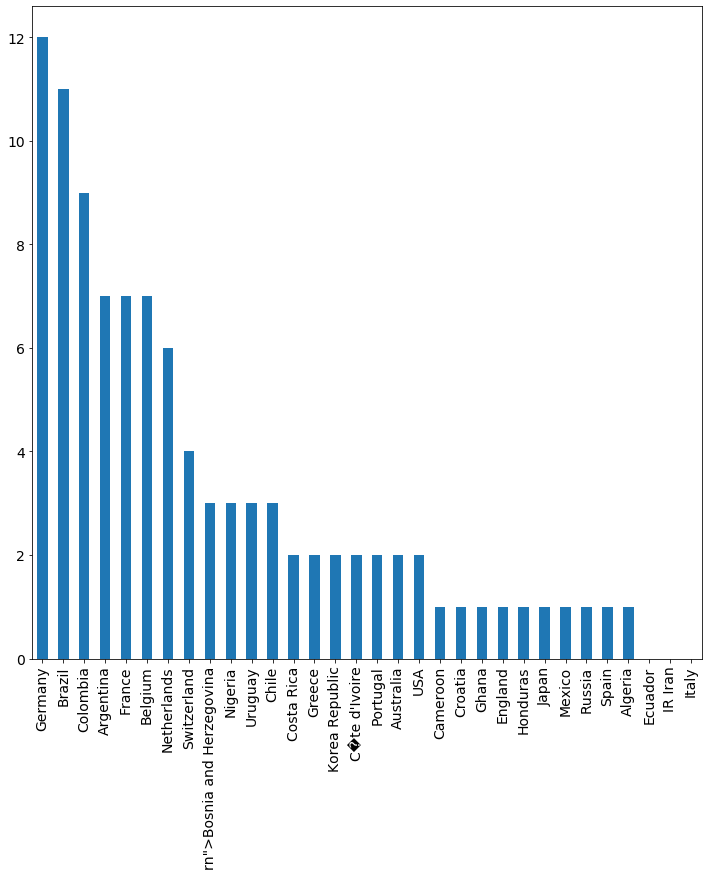

In [189]:
goal_2014.plot(x=goal_2014.index, y=goal_2014.values, kind="bar", figsize=(12, 12), fontsize=14)

## Q9. 월드컵 4강 이상 성적 집계 

In [190]:
world_cups = pd.read_csv("WorldCups.csv")
winner = world_cups["Winner"]
runners_up = world_cups["Runners-Up"]
third = world_cups["Third"]
fourth = world_cups["Fourth"]

winner_count = pd.Series(winner.value_counts())
runners_up_count = pd.Series(runners_up.value_counts())
third_count = pd.Series(third.value_counts())
fourth_count = pd.Series(fourth.value_counts())

ranks = pd.DataFrame({
  "Winner" : winner_count,
  "Runners_Up" : runners_up_count,
  "Third" : third_count,
  "Fourth" : fourth_count
})
ranks = ranks.fillna(0).astype('int64')
ranks = ranks.sort_values(['Winner', 'Runners_Up', 'Third', 'Fourth'], ascending=False)

print(ranks)


                Winner  Runners_Up  Third  Fourth
Brazil               5           2      2       2
Italy                4           2      1       1
Germany FR           3           3      1       1
Argentina            2           3      0       0
Uruguay              2           0      0       3
Germany              1           1      3       0
France               1           1      2       1
England              1           0      0       1
Spain                1           0      0       1
Netherlands          0           3      1       1
Czechoslovakia       0           2      0       0
Hungary              0           2      0       0
Sweden               0           1      2       1
Poland               0           0      2       0
Austria              0           0      1       1
Portugal             0           0      1       1
Chile                0           0      1       0
Croatia              0           0      1       0
Turkey               0           0      1       0
